    Marzouki Amine
    Numero d'etudiant: 28616952

In [142]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# autoreload to get the new changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Table des matières

<style>
a {
  color: inherit; /* blue colors for links too */
  text-decoration: inherit; /* no underline */
}
</style>

<h2>
<ol>
    <li>
        <a href='#Compte-rendu-demand%C3%A9-(-probl%C3%A8me-%C3%A0-2-classes-)' style="text-decoration: inherit;"> 
            Classification binaire
        </a>
        <ul> 
            <li>
                <a href='#Data-discovery:-Plotting-the-digits' style="text-decoration: inherit;"> 
                    Data discovery
                </a>
            </li>
            <li>
                <a href='#Les-données-sont-elles-déséquilibrées-?' style="text-decoration: inherit;"> 
                    Les données sont elles déséquilibrées-?
                </a>
            </li>
            <li>
                <a href='#Les-classifieurs-Linéaires' style="text-decoration: inherit;"> 
                    Les classifieurs Linéaires
                </a>
            </li>
            <li>
                <a href='#Autres-classifieurs' style="text-decoration: inherit;"> 
                    Autres classifieurs
                </a>
            </li>
            <li>
                <a href='#Comparaison-entre-les-classifieurs' style="text-decoration: inherit;"> 
                    Comparaison entre les classifieurs
                </a>
            </li>
            <li>
                <a href='#Conclusion' style="text-decoration: inherit;"> 
                    Conclusion
                </a>
            </li>
            <li>
                <a href='#Experience:-Reduire-les-dimensions' style="text-decoration: inherit;"> 
                    Experience: Reduire les dimensions
                </a>
            </li>
            <li>
                <a href='#Experience:-redressage-des-images' style="text-decoration: inherit;"> 
                    Experience: Redressage des images (DeSkewing)
                </a>
            </li>
            <li>
                <a href='#Fonction-pour-generer-les-classes-du-fichier-eval' style="text-decoration: inherit;"> 
                    Fonction pour generer les classes du fichier eval
                </a>
            </li>
        </ul>
    </li><br>
    <li>
        <a href='#MNIST-ALL-(optional)' style="text-decoration: inherit;"> 
        Classification multi-class 
        </a>
        <ul>
            <li>
                <a href='#MultiClass-KNN' style="text-decoration: inherit;"> 
                    MultiClass-KNN
                </a>
            </li>
            <li>
                <a href='#Avec-le-redressage-(Deskewing)' style="text-decoration: inherit;"> 
                    MultiClass-KNN avec le redressage (Deskewing)
                </a>
            </li>
            <li>
                <a href='#One-VS-Rest' style="text-decoration: inherit;"> 
                    One vs Rest
                </a>
            </li>
            <li>
                <a href='#Refactoring-the-code' style="text-decoration: inherit;"> 
                    Refactoring the code
                </a>
            </li>
            <li>
                <a href='#Conclusion-pour-la-partie-optionnelle' style="text-decoration: inherit;"> 
                    Conclusion pour la partie optionnelle
                </a>
            </li>
        </ul>
    </li><br>
    <li>
        <a href='#FIN' style="text-decoration: inherit;"> 
            FIN
        </a>
    </li>
</ol>
</h2>
    

# Compte-rendu demandé ( problème à 2 classes )

### Loading data function

In [21]:
def load_data(path):
    df = pd.read_csv(path, sep=';', header=None)
    df.rename(columns={785:'label'}, inplace=True)
    df = df.drop(columns=[0])
    
    X = df.loc[:, df.columns != 'label'].to_numpy()
    Y = df.loc[:, df.columns == 'label'].to_numpy()
    
    return X, Y

In [22]:
X_train, Y_train = load_data('Bases_IADS/train.csv')
X_test, Y_test = load_data('Bases_IADS/test.csv')

In [4]:
X_train.shape

(1000, 784)

## Data discovery: Plotting the digits

Plot images with their labels each 100s indices


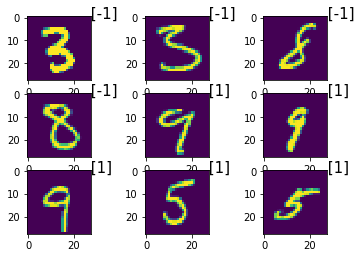

In [159]:
print('Plot images with their labels each 100s indices')

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.text(0.5, 0.5, "             " + str(Y_train[i*100]),fontsize=15)
    plt.imshow(X_train[i*100].reshape(28, 28))

    Ici on voit clairement que notre probleme est de distinguer le groupe des 2 chiffres (3s et 8s) qui a un label = -1 et l'autre groupe compose de (5s et 9s) qui a un label = 1

## Les données sont-elles déséquilibrées ?

Text(0, 0.5, 'Count')

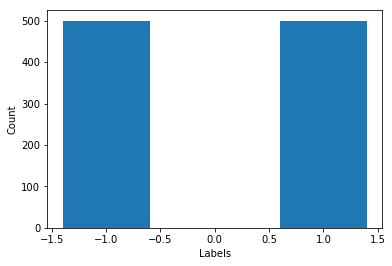

In [6]:
plt.bar([-1, 1], [list(Y_train).count(-1), list(Y_train).count(1)])
plt.xlabel("Labels")
plt.ylabel("Count")

On voit que les donnees sont parfaitement equilibree, ce qui rend nos classifieurs unbiased pour une certaine categorie.

In [224]:
# Results (a list of tuples (train, test) accuracy of our classifiers to compare them later)
results = []

# classif dict
classif_dict = dict()
classif_dict['random_linear'] = None
classif_dict['perceptron'] = None
classif_dict['oneStepPerceptron'] = None
classif_dict['knn'] = None

# classifiers list (objects)
classifiers = []

## Les classifieurs Linéaires

### ClassifierLineaireRandom

    Je sais deja que le ClassifierLineaireRandom va pas donner grand chose, mais on va l'essayer quand meme pour qu'on puisse le comparer avec les autres, et pour prendre son accuracy comme un point de depart

### <p style='color : red'> Iterating over 1e6 versions of random linear classifiers </p>

In [7]:
acc = 0.5
seed = 1
np.random.seed(seed)
best_random_classifier = cl.ClassifierLineaireRandom(X_train.shape[1])

for i in range(2, 100000):
    np.random.seed(i)
    random_linear = cl.ClassifierLineaireRandom(X_train.shape[1])
    if random_linear.accuracy(X_test, Y_test) > acc:
        acc = random_linear.accuracy(X_test, Y_test)
        seed = i
        np.random.seed(i)
        best_random_classifier = cl.ClassifierLineaireRandom(X_train.shape[1])

In [20]:
print("The best seed ", seed)

The best seed  4423


In [46]:
np.random.seed(4423)
best_random_classifier = cl.ClassifierLineaireRandom(X_train.shape[1])

best_random_classifier_train_acc = best_random_classifier.accuracy(X_train, Y_train)
best_random_classifier_test_acc  = best_random_classifier.accuracy(X_test, Y_test)

print("For ClassifierLineaireRandom ")
print("Train accuracy: ", best_random_classifier_train_acc)
print("Test  accuracy: ", best_random_classifier_test_acc)

For ClassifierLineaireRandom 
Train accuracy:  0.767
Test  accuracy:  0.781


In [225]:
classif_dict['random_linear'] = (best_random_classifier_train_acc, best_random_classifier_test_acc)
classifiers.append(best_random_classifier)

### Rosenblatt's Perceptron

    J'ai fais la meme chose avec ce classifieur, et j'ai pris le meilleure seed pour la meilleure initialisation. Je me suis retrouve avec un perceptron qui a une accuracy sur le test de 88.2% apres la phase de fine-tunning. Le meilleur perceptron pour cette tache que j'ai trouve a comme parametres:
    1. eps = 10^-4
    2. max_iter = 10^4
    3. random_seed = 541

    Avec cette experience, j'ai vu clairement l'impact de la phase d'initialisation pour le perceptron, car l'accuracy du test varie de 82% jusqu'a 88.2% (teste sur 1000 versions).

In [28]:
%%time
np.random.seed(541)
eps = 1e-4
best_perceptron = cl.ClassifierPerceptron(X_train.shape[1], eps, 10e3)
best_perceptron.train(X_train, Y_train)

CPU times: user 21.3 s, sys: 7.66 ms, total: 21.3 s
Wall time: 21.4 s


In [49]:
%%time

best_perceptron_train_acc = best_perceptron.accuracy(X_train, Y_train) 
best_perceptron_test_acc  = best_perceptron.accuracy(X_test, Y_test)

print("For Rosenblatt's Perceptron ")
print("Train accuracy: ", best_perceptron_train_acc)
print("Test  accuracy: ", best_perceptron_test_acc)
print("\n")

For Rosenblatt's Perceptron 
Train accuracy:  1.0
Test  accuracy:  0.882


CPU times: user 315 ms, sys: 3.84 ms, total: 319 ms
Wall time: 318 ms


In [226]:
classif_dict['perceptron'] = (best_perceptron_train_acc, best_perceptron_test_acc)
classifiers.append(best_perceptron)

### One Step Perceptron

    J'ai programme cette version du perceptron qui utilise la solution analytique pour trouver les bonnes valeurs des "wieghts" [d'ou le nom du "en une seule etape", car on voit pas clairement las phase d'apprentissage dans le sens ou c'est une phase iteratife et reactif avec cette methode ]

    Une etape = calculer le pseudo-inverse de la matrice au but de minimiser le taux d'erreur (Le but c'etait de rendre perceptron plus rapide avec plus, au moins les meme performances).
    
    Il y a une difference ici, c'est que dans cette version ma fonction du cout (cost) est les moindres carrés, au lieu d'utiliser la fonction de perte 0-1 (Hinge loss). Il y a 2 raisons pourquoi j'ai choisi les moindres carres (MSE):
<ol>
    
<li> Normalement MSE est utilisee pour evaluer un modele de regression ( predire des valeures continues ). Et puisque 0 et 1 appartient a R, donc on peut l'adapter. </li>
<li> MSE a une solution <b> stable et unique </b> qui est obtenu par resoudre l'equation de la derivee (gradient = 0 ) [voir les photo ci-dessous pour les detailes] </li>
</ol>
<br><br>
<img style="transform: rotate(90deg); width:50%" src="images/1.jpg"> <br><br><br><br><br>
<img style="transform: rotate(90deg); width:50%" src="images/2.jpg"> <br><br><br><br><br>
<img style="transform: rotate(90deg); width:50%" src="images/3.jpg"> <br><br><br>
<img style="width:50%" src="images/4.jpg">

In [19]:
one_step_perceptron = cl.ClassifierOneStepPerceptron(X_train.shape[1])
one_step_perceptron.train(X_train, Y_train)

In [51]:
%%time

one_step_perceptron_train_acc = one_step_perceptron.accuracy(X_train, Y_train)
one_step_perceptron_test_acc  = one_step_perceptron.accuracy(X_test, Y_test)

print("For one_step_perceptron ")
print("Train accuracy: ", one_step_perceptron_train_acc)
print("Test  accuracy: ", one_step_perceptron_test_acc)
print("\n")

For one_step_perceptron 
Train accuracy:  0.994
Test  accuracy:  0.82


CPU times: user 319 ms, sys: 0 ns, total: 319 ms
Wall time: 319 ms


In [227]:
classif_dict['oneStepPerceptron'] = (one_step_perceptron_train_acc, one_step_perceptron_test_acc)
classifiers.append(one_step_perceptron)

## Using OneStepPerceptron comme un building block pour le Perceptron de Rosenblatt

    L'idee c'est remplacer la phase d'initialisation aleatoire qui est faire par le perceptron de Rosenblatt, et la remplacer directement avec les meilleurs weights qu'on peut calculer avec le OneStep. Et apres on fait l'apprentissage.

In [45]:
%%time
# get oneStepPerceptron weights
init_weights = one_step_perceptron.weights

eps = 1e-4
max_iter = 1e4

# Create a new Perceptron (to compare)
perceptron_v2 = cl.ClassifierPerceptron(X_train.shape[1], eps, max_iter)

# init weights with oneStepPerceptron weights
perceptron_v2.weights = init_weights

# training phase
perceptron_v2.train(X_train, Y_train)

CPU times: user 205 ms, sys: 0 ns, total: 205 ms
Wall time: 204 ms


    On voit qu'on a gagne beaucoup du temps (204ms au lieu de 21.4 secondes), et on a bien fitted the data

In [46]:
perceptron_v2.accuracy(X_train, Y_train)

1.0

    Accuracy avec cette methode d'initialisation:

In [47]:
perceptron_v2.accuracy(X_test, Y_test)

0.865

    Ce qui est deja pas mal pusiqu'on a gagne du bcp du temps et 4.5% en plus dans l'accuracy du test, bien que le classifieur a bien "fitted the data" (100% dans training accuracy) mais on peut dire qu'il a fait un "overfitting" dans ce cas (86.5% dans test accuracy).

## Autres classifieurs 

### Kernel perceptron

    Pour la version kernelized du perceptron, comme on a 784 dims, si on fait juste une transformation avec un polynomial de 2eme degree on aura 1 + 784 + 306936 ~ 300k features, donc c'est pas pratique.

### KNN classifier

    Pour le KNN on va voir qu'il est le meilleure en terme d'accuracy mais il est aussi le plus long. Puisque l'algorithme qu'on a implemente suit l'approche du brute-force (calculer toutes les distances, les trier et puis choisir les k-plus proches) et on est restraint au classifieur des tmes qu'on a implemente, donc la seule chose que j'ai pu faire c'est d'integrer le parallelisme dans la tache pour gagner un peu du temps.

    J'ai aussi essaye plusieurs valeurs de K, normalement on doit choisir juste les valeurs impaires pour eviter le probleme du vote 50% 50% pour les deux classes, mais avec la maniere qu'on a implemente predict(), dans ce cas d'egalite des votes on predit -1. 

    Apres que j'ai essaye plusieurs valeurs, j'ai trouve k=4 est la meilleure pour notre cas.

In [24]:
k = 4
knn = cl.ClassifierKNN(X_train.shape[1], k)
knn.train(X_train, Y_train)

In [288]:
%%time

print(knn.accuracy(X_train, Y_train))

CPU times: user 10min 19s, sys: 220 ms, total: 10min 20s
Wall time: 10min 20s


0.948

    Avec cette version ci-dessous (fast_accuracy) on trouve que c'est 2 fois plus rapide que la methode implemente          originale.

    NB: je l'ai integre juste dans la classe KNN, et non pas la classe Classifier car le cout pour creer des nouveaux processus pour atteindre le parallelisme est plus grand que faire le calcul d'une maniere sequentiel pour les autres classieurs (Perceptron est rapide en tous cas, un simple produit scalair suffit pour faire la prediction)

In [290]:
%%time

knn_train_accuracy = knn.fast_accuracy(X_train, Y_train)
print(knn_train_accuracy)

CPU times: user 6.3 s, sys: 2.96 s, total: 9.26 s
Wall time: 5min 3s


In [289]:
%%time

knn_test_accuracy = knn.fast_accuracy(X_test, Y_test)

CPU times: user 7.79 s, sys: 3 s, total: 10.8 s
Wall time: 10min 3s


In [291]:
print("For KNN with k = ", knn.k)
print("Train accuracy: ", knn_train_accuracy)
print("Test  accuracy: ", knn_test_accuracy)

For KNN with k =  4
Train accuracy:  0.969
Test  accuracy:  0.948


In [228]:
classif_dict['knn'] = (knn_train_accuracy, knn_test_accuracy)
classifiers.append(knn)

    J'ai implemente aussi confusion_matrix pour avoir plus de details sur la performance des classifieurs, et comme le KNN met bcp de temps pour calculer les predictions pour toute la base, je stocke aussi le resultat des predictions, pour l'utiliser apres. 

In [286]:
%%time

ev.confusion_matrix(Y_test, knn._last_predictions)

CPU times: user 5.15 ms, sys: 0 ns, total: 5.15 ms
Wall time: 5.13 ms


{'TP': 468,
 'TN': 480,
 'FP': 20,
 'FN': 32,
 'Precision': 0.9590163934426229,
 'Recall': 0.936}

## Comparaison entre les classifieurs

In [75]:
classif_dict

{'random_linear': (0.767, 0.781),
 'perceptron': (1.0, 0.882),
 'oneStepPerceptron': (0.994, 0.82),
 'knn': (0.969, 0.948)}

In [229]:
def compare_classifiers(classifiers : dict, scatter=False):
    """
        Function that plots train/test accuracies for the given classifiers.
        classifiers = dictionnary where the keys are strings and values are tuples (train_acc, test_acc)
    """
    
    assert isinstance(classifiers, dict)
    for classifier, accuracies in classifiers.items():
        assert len(accuracies) == 2 # train and test
        
    # constructing train/test lists
    
    train_perf, test_perf = [], []
    classifs = [i for i in range(len(classifiers))]
    
    for c in classifiers:
        train_perf.append(classifiers[c][0] * 100)
        test_perf.append(classifiers[c][1] * 100)
    
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    
    # plotting the data
    
    if scatter:
        plt.scatter(classifs, train_perf, label='Training performane')
        plt.scatter(classifs, test_perf, label='Testing performane')
    else:
        plt.plot(classifs, train_perf, label='Training performane')
        plt.plot(classifs, test_perf, label='Testing performane')
    
    # annotations
    
    for x,y in zip(classifs, train_perf):
        ax.annotate('%.2f%%' % y, xy=(x,y), textcoords='data')
        
    for x,y in zip(classifs, test_perf):
        ax.annotate('%.2f%%' % y, xy=(x,y), textcoords='data')
    
    # x,y labels and displaying classifs names
    plt.ylabel('Performane')
    plt.xlabel('Classifiers')
    plt.xticks(np.arange(len(classifiers)), list(classifiers.keys()), rotation='45')
    
    # showing the best classifier in the title
    best_index = test_perf.index(max(test_perf))
    names = list(classifiers.keys())

    plt.title("Comparing multiple classifiers\nBest classifier is %s with a test accuracy of %.2f%%" 
              %(names[best_index], test_perf[best_index]))
    plt.legend()
    plt.show()

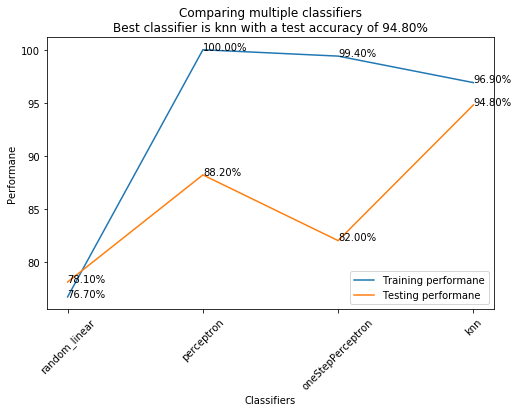

In [136]:
compare_classifiers(classif_dict)

## Conclusion

    On trouve que le KNN (avec k = 4) est le meilleur classifieur avec test accuracy = 94.8% et il generalise tres bien puisque la difference entre train et test accuracy est juste 2% alors que par exemple les perceptrons ne generalise pas bien du tout ( difference ~12% et ~18% pour le meilleur perceptron et oneStepPerceptron respectivement )

    En terme du temps, on trouve que le KNN est le plus long (dans la phase de prediction/inference) meme avec tout les optimisations qu'on a fait. Cela est du a l'algorithme du bruteforce qu'on utilise, on peut bien le rendre plus rapide en utilisant K-d tree ou bien on calcule la "frontiere de decision" en utilisant Voronoi Tessellation.
    
    Avec les deux methodes, bien que K-d tree est meiux car on a un grand nombre de dimensions, on va rendre notre KNN plus long dans la phase d'apprentissage (calcule de l'arbre ou Diagramme de Voronoï), mais plus rapide dans la phase de prediction des nouveaux classes.
    
    Une autre solution sera reduire le nombre des dimensions par selectionner les features qui sont utiles pour faire la prediction.

# Experience: Reduire les dimensions

    Le but de cette experience est de savoir l'impact de reduire les dimensions des images. On remarque que presque tous les images sont centrees, donc les coins des images sont inutiles pour fair la prediction, ce sont des pixels inutiles qui n'importent aucune information qui peut aider le classifieur.

    Une des maniers simples pour reduire les dimensions pour ce cas, est de juste appliquer un zoom-in sur les images comme suit:

In [244]:
def zoom_in(image, scale=2):
    """
        Applying zoom-in by taking the average of the pixels of each scale X scale block on the image.
    """
    original_width, original_height = image.shape[1], image.shape[0]
    
    assert int(scale) >= 1
    assert original_width % scale == 0
    assert original_height % scale == 0

    width, height = original_width // scale, original_height // scale

    zoomed_img = np.zeros((height, width), dtype=image.dtype)

    for i in range(0, original_height, scale):
        for j in range(0, original_width, scale):
            zoomed_img[i//scale, j//scale] = np.mean(image[i:i + scale, j:j+scale])

    return zoomed_img

### Exemple apres le zoom

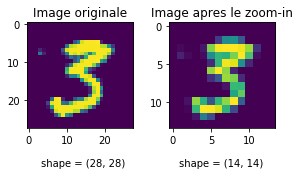

In [245]:
original_img = X_train[0].reshape(28,28)
zoomed_img = zoom_in(original_img, scale=2)

fig = plt.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)

ax1.title.set_text('Image originale')
ax2.title.set_text('Image apres le zoom-in')

ax1.imshow(original_img)
ax2.imshow(zoomed_img)

fig.tight_layout()
fig.text(0.2, 0.4, "shape = " + str(original_img.shape), ha='center')
fig.text(0.52, 0.4, "shape = " + str(zoomed_img.shape), ha='center')
plt.show()

### Appliquant le zoom-in sur toutes les images

In [183]:
X_train_zoomed = np.asarray([zoom_in(img.reshape(28, 28), scale=2).ravel() for img in X_train])
X_test_zoomed = np.asarray([zoom_in(img.reshape(28, 28), scale=2).ravel() for img in X_test])

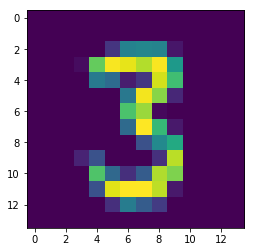

In [184]:
plt.imshow(X_test_zoomed[5].reshape(14, 14))

In [186]:
X_test_zoomed[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  39, 112, 116, 113,  15,   0,
         0,   0,   0,   0,   0,   0,   8, 193, 251, 244, 224, 251, 137,
         0,   0,   0,   0,   0,   0,   0,   0, 103,  88,  20,  41, 236,
       175,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 101, 249,
       208,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 181,
       215,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        87, 253, 169,  17,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  63, 119, 154,   0,   0,   0,   0,   0,   0,   0,  25,
        64,   0,   0,   0,  35, 227,   0,   0,   0,   0,   0,   0,   0,
         0, 183,  85,  34,  74, 223, 204,   0,   0,   0,   0,   0,   0,
         0,   0,  64, 242, 253, 253, 228,  17,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  34, 106,  74,  44,   0,   0,   0,   

### On essaye les classifieurs sur la nouvelles dataset

In [171]:
print(X_train_zoomed.shape)
print(X_test_zoomed.shape)

(1000, 196)
(1000, 196)


    On a reduit les dimensions de 784 à seulement 196 (14x14)

### Les KNNs : essayant plusieurs valeurs de k

In [187]:
test_zoom_knn = cl.ClassifierKNN(X_train_zoomed.shape[1], 4)
test_zoom_knn.train(X_train_zoomed, Y_train)

In [188]:
%%time

test_zoom_knn.fast_accuracy(X_test_zoomed, Y_test)

CPU times: user 1.44 s, sys: 437 ms, total: 1.88 s
Wall time: 1min 20s


0.949

    Dès le départ, on voit qu'on a diminuer dramatiquement le temps pour avoir l'accuracy de 5min à 1min avec un peu pres la meme accuracy ( avec une amélioration de 0.001% ).
    Avec cette setup, on peut maintenant essayer plusieurs valeurs sans probleme.

In [191]:
# Training 

k_values = range(1, 11)
zoomed_KNNs = []

for k in k_values:
    new_knn = cl.ClassifierKNN(X_train_zoomed.shape[1], k)
    new_knn.train(X_train_zoomed, Y_train)
    
    zoomed_KNNs.append(new_knn)

In [193]:
%%time

zoomed_KNNs_accuracies = {z_KNN.k : z_KNN.fast_accuracy(X_test_zoomed, Y_test) for z_KNN in zoomed_KNNs}

CPU times: user 16.1 s, sys: 5.39 s, total: 21.5 s
Wall time: 16min 2s


In [194]:
zoomed_KNNs_accuracies

{1: 0.946,
 2: 0.939,
 3: 0.953,
 4: 0.949,
 5: 0.944,
 6: 0.937,
 7: 0.943,
 8: 0.943,
 9: 0.946,
 10: 0.944}

In [200]:
max_key = max(zoomed_KNNs_accuracies, key=zoomed_KNNs_accuracies.get)

print("Best K-value is %d with a test-accuracy of %.3f" % (max_key, zoomed_KNNs_accuracies[max_key]))

Best K-value is 3 with a test-accuracy of 0.953


    C'est deja pas mal, on a gagne beaucoup de temps en plus d'une amelioration de 0.005%. La meilleur valeur de k 
    est 3.

### Le tour des perceptrons maintenant

#### Rosenblatt's Perceptron

In [205]:
%%time

zoomed_perceptron = cl.ClassifierPerceptron(X_train_zoomed.shape[1], 1e-4, 1e4)
zoomed_perceptron.train(X_train_zoomed, Y_train)

CPU times: user 8min 17s, sys: 472 ms, total: 8min 18s
Wall time: 8min 18s


In [206]:
zoomed_perceptron.accuracy(X_train_zoomed, Y_train)

0.953

In [207]:
%%time

zoomed_perceptron.accuracy(X_test_zoomed, Y_test)

CPU times: user 53.2 ms, sys: 61 µs, total: 53.3 ms
Wall time: 52.8 ms


0.86

#### Test du OneStepPerceptron

In [208]:
%%time

zoomed_oneStep = cl.ClassifierOneStepPerceptron(X_train_zoomed.shape[1])
zoomed_oneStep.train(X_train_zoomed, Y_train)

CPU times: user 30.8 ms, sys: 147 µs, total: 31 ms
Wall time: 142 ms


In [214]:
%%time

print("OneStepPerceptron traininng accuracy ", zoomed_oneStep.accuracy(X_train_zoomed, Y_train))
print("OneStepPerceptron testing accuracy ", zoomed_oneStep.accuracy(X_test_zoomed, Y_test))
print()

OneStepPerceptron traininng accuracy  0.956
OneStepPerceptron testing accuracy  0.882

CPU times: user 112 ms, sys: 0 ns, total: 112 ms
Wall time: 110 ms


    On a arrive a la meme performance du meilleur perceptron de la section precedante avec bcp moins de temps. En revanche on voit qu'on a pas separer toutes les donnees.
    
    test_accuracy = 88.2%

In [222]:
%%time
# using OneStep as a building block

zoomed_perceptron2 = cl.ClassifierPerceptron(X_train_zoomed.shape[1], 1e-4, 1e4)
zoomed_perceptron2.weights = zoomed_oneStep.weights

zoomed_perceptron2.train(X_train_zoomed, Y_train)

CPU times: user 6min 29s, sys: 179 ms, total: 6min 29s
Wall time: 6min 29s


In [223]:
%%time

print("OneStepPerceptron traininng accuracy ", zoomed_perceptron2.accuracy(X_train_zoomed, Y_train))
print("OneStepPerceptron testing accuracy ", zoomed_perceptron2.accuracy(X_test_zoomed, Y_test))
print()

OneStepPerceptron traininng accuracy  0.949
OneStepPerceptron testing accuracy  0.863

CPU times: user 88.7 ms, sys: 0 ns, total: 88.7 ms
Wall time: 87.7 ms


    Apres plusieurs tentative, j'ai pas pu ameliorer test_accuracy du perceptron au-dela de 88.2%.

#### Kernelized Perceptron

    Maintenant pusiqu'on a mois de dimensions, plus precisement on a 1 + 196 +18336 ~= 19k, on peut essayer la version kernelise du Perceptron.

In [250]:
%%time

kernel_perceptron_zoom = cl.ClassifierPerceptronKernel(X_train_zoomed.shape[1], 1e-4, ut.KernelPoly(2), max_iter=1e2)
kernel_perceptron_zoom.train(X_train_zoomed, Y_train)

CPU times: user 1h 31min 17s, sys: 2.58 s, total: 1h 31min 20s
Wall time: 1h 31min 21s


In [251]:
%%time

print("kernel_perceptron_zoom traininng accuracy ", kernel_perceptron_zoom.accuracy(X_train_zoomed, Y_train))
print("kernel_perceptron_zoom testing accuracy ", kernel_perceptron_zoom.accuracy(X_test_zoomed, Y_test))
print()

kernel_perceptron_zoom traininng accuracy  1.0
kernel_perceptron_zoom testing accuracy  0.948

CPU times: user 3min 59s, sys: 256 ms, total: 4min
Wall time: 4min


    On voit que c'est meilleur du rosenblatt's perceptron, mais il prend bcp plus de temps pour la phase d'apprentissage  (1h 31min) car il est trop complexe.
    
    Test accuracy avec la version kernelise du perceptron est 94.8%

## Fin d'experience: Reduire les dimensions -> CONCLUSION

    Avec cette transformation qu'on a fait, on a pu ameliore l'accuracy avec bcp moins de dimensions.
    Cependant, on gagne plus de temps ce qui peut etre interessant dans un environment qui est sensibles au temps.
    
    En outre, on voit qu'avec la version kernelise du perceptron on a une bonne accuracy 94.8% contrairement au meilleur  rosenblatt's perceptron que j'ai pu avoir qui avait une accuracy de 88.2%.
    
    Enfin, il reste Knn avec k=3 (apres la reduction des dimensions) le meilleur classifieur avec une test accuracy de 95.3%

# Experience: redressage des images

    Le probleme avec la maniere utilisee pour calculer la similarite entre 2 images, typiquement pour le KNN qu'on a implemente ici qui repose sur le calcul de la distance euclidienne, on peut avoir une grande distance entre 2 images bien qu'elles representent le meme chiffre, car l'une est juste une transformation de l'autre.
    
    Pour regler ce probleme, on peut redresser (Deskew) notre dataset avant de se lancer dans la phase d'apprentissage, on peut bien implementer cette phase facilement en utilisant opencv, mais comme on utilise juste numpy, j'ai trouve une solution en ligne et j'ai utilise le code ici.
    
    Source: https://fsix.github.io/mnist/Deskewing.html

### Exemple

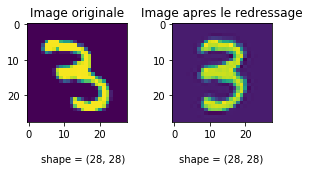

In [304]:
original_img = X_train[14].reshape(28,28)
skewed_img = deskew(original_img)

fig = plt.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)

ax1.title.set_text('Image originale')
ax2.title.set_text('Image apres le redressage')

ax1.imshow(original_img)
ax2.imshow(skewed_img)

fig.tight_layout()
fig.text(0.2, 0.4, "shape = " + str(original_img.shape), ha='center')
fig.text(0.52, 0.4, "shape = " + str(skewed_img.shape), ha='center')
plt.show()

## Code pour faire le redressage

In [224]:
# source: https://fsix.github.io/mnist/Deskewing.html

from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix



def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

#### redressage des images

In [239]:
X_train_deskew = np.asarray([deskew(img.reshape(28,28)).ravel() for img in X_train])
X_test_deskew = np.asarray([deskew(img.reshape(28,28)).ravel() for img in X_test])

## Test avec un KNN (avec redressage)

In [240]:
skew_KNN = cl.ClassifierKNN(X_train_deskew.shape[1], 3)
skew_KNN.train(X_train_deskew, Y_train)

In [324]:
skew_KNN.fast_accuracy(X_test_deskew, Y_test)

0.977

# Fin d'experience: Redressage -> CONCLUSION

    Oupla, on a gagne ~ 3% d'accuracy en appliquant cette phase de prétraitement.

# Fonction pour generer les classes du fichier eval

In [305]:
def generate_eval_labels(classifier : cl.Classifier, eval_file_path : str, out_file='resultat.csv', separator=';',
                         skew = False, zoom = False):
    
    assert isinstance(classifier, cl.Classifier)
    assert isinstance(eval_file_path, str)
    assert isinstance(separator, str)
    
    import multiprocessing
    import concurrent
    import pandas as pd
    import numpy as np
    
    try:
        eval_df = pd.read_csv(eval_file_path, sep=separator, header=None)
        eval_df.drop(columns=[785], inplace=True) # dropping the useless label
        
        ids = eval_df[0].to_numpy()
        eval_np = eval_df.drop(columns=[0]).to_numpy()
        
        # not using deskew to not have a conflict beteween var_name and function
        if skew: 
            print("[Warning] you applied deskewing")
            eval_np = np.asarray([deskew(img.reshape(28,28)).ravel() for img in eval_np])
            
        if zoom:
            print("[Warning] you applied zoom-in")
            eval_np = np.asarray([zoom_in(img.reshape(28, 28), scale=2).ravel() for img in eval_np])
        
        res = []
        
        # constructing predictions 
        
        if isinstance(classifier, cl.ClassifierKNN):        
            N = len(eval_np)
            cpu_count = multiprocessing.cpu_count()
            executor = concurrent.futures.ProcessPoolExecutor(cpu_count)

            futures = [executor.submit(classifier.predict, description) for description in eval_np]
            concurrent.futures.wait(futures)

            predictions = [f.result() for f in futures]
            
        else:
            predictions = []
            
            for description in eval_np:
                predictions.append(classifier.predict(description))
        
        # constructing the array of (id, estimated_class)
        
        for i in range(len(eval_np)):
            res.append([ ids[i], predictions[i] ])
            
        res = np.asarray(res)
        pd.DataFrame(res).to_csv(out_file, header=None, index=None, sep=';')
        
        print("Done")
        
    except FileNotFoundError:
        print("File not found !!")
        
    except (KeyboardInterrupt, SystemExit):
        for future in futures:
            future.cancel()
        
        print("Canceled")

### Fonction pour generer les fichiers resultats pour tous les classifieurs dans classif_dict

In [306]:
def generate_eval_labels_multi(classifiers : list, eval_file_path : str, separator=';', skew=False, zoom=False):
    assert isinstance(classifiers, list)
    
    for classifier in classifiers:
        classifier_name = str(classifier).split('.')[-1].split(' ')[0]
        print("Constructing eval file for %s classifier" % classifier_name)
        out = "resultat_" + classifier_name + '.csv'
        generate_eval_labels(classifier, eval_file_path, out_file=out, separator=separator, skew=skew, zoom=zoom)

In [265]:
%%time

generate_eval_labels_multi(classifiers, '/home/shetsecure/dataScience/3i026/Bases_IADS/eval.csv')

Constructing eval file for ClassifierLineaireRandom classifier
Done
Constructing eval file for ClassifierPerceptron classifier
Done
Constructing eval file for ClassifierOneStepPerceptron classifier
Done
Constructing eval file for ClassifierKNN classifier
Done
CPU times: user 7.09 s, sys: 3.09 s, total: 10.2 s
Wall time: 5min 26s


In [326]:
generate_eval_labels(skew_KNN, '/home/shetsecure/dataScience/3i026/Bases_IADS/eval.csv', \
                     out_file='resultat_skewKnn_binary.csv', skew=True)

[Warning] you applied deskewing
Done


# MNIST ALL (optional)

    Chargement des donnees et visualisation

In [280]:
mnist_train_x, mnist_train_y = load_data('Bases_IADS_multiclasses/train_multi.csv')
mnist_test_x, mnist_test_y = load_data('Bases_IADS_multiclasses/test_multi.csv')

<BarContainer object of 10 artists>

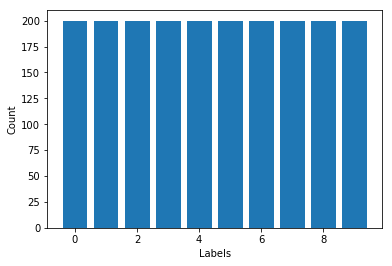

In [58]:
unique, counts = np.unique(mnist_train_y, return_counts=True)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.bar(unique, counts)

    Les donnees sont bien equilibres (200 exemples pour chaque chiffre)

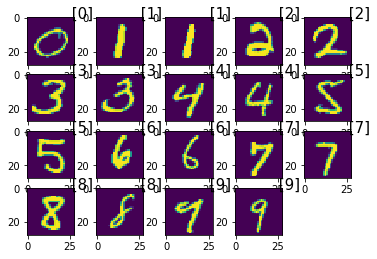

In [6]:
for i in range(1, 20):
    plt.subplot(4, 5, i)
    plt.text(0.5, 0.5, "         " + str(mnist_train_y[i*100]),fontsize=15)
    plt.imshow(mnist_train_x[i*100].reshape(28, 28))

    Puisqu'on est maintenant dans un probleme de classification multi-classes et non pas binaire, on doit changer notre maniere de faire. 

    J'ai modifie un peu le classifieur KNN pour qu'il soit multi-classes

### MultiClass KNN

In [281]:
class MultiClassKNN(cl.ClassifierKNN):
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
        Argument:
            - intput_dimension (int) : dimension d'entrée des exemples
            - k (int) : nombre de voisins à considérer
        Hypothèse : input_dimension > 0
        """
        super().__init__(input_dimension, k)
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        dist_array = np.asarray([self.dist_euc(x,y) for y in self.desc_set])
        sorted_indices = np.argpartition(dist_array, self.k)[:self.k]

        possible_labels = [self.label_set[i][0] for i in sorted_indices]
        
        # return most occured label
        return max( [(possible_labels.count(label), label) for label in set(possible_labels)] )[1]
    
    def accuracy(self, desc_set, label_set):
        """ 
        Calculate accuracy using multiple processes.
        
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        return self.fast_accuracy(desc_set, label_set)
    
    def fast_accuracy(self, desc_set, label_set):
        """ 
        Calculate accuracy using multiple processes.
        
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        N = len(desc_set)
        
        if np.all(self._last_predicted_desc == desc_set):
            predictions = self._last_predictions
        else:
            predictions = self.predict_all(desc_set)
        
        acc = [1 if predictions[i] == label_set[i] else 0 for i in range(N)]
        
        return float(sum(acc) / N)

In [347]:
mnist_knn = MultiClassKNN(mnist_train_x.shape[1], 3)
mnist_knn.train(mnist_train_x, mnist_train_y)

In [21]:
%%time
mnist_knn.fast_accuracy(mnist_train_x, mnist_train_y)

CPU times: user 39.6 s, sys: 14.4 s, total: 54 s
Wall time: 20min 7s


0.95

In [19]:
%%time
mnist_knn.fast_accuracy(mnist_test_x, mnist_test_y)

CPU times: user 13.9 s, sys: 17 s, total: 30.9 s
Wall time: 19min 50s


0.8965

    Donc pour le MultiClassKNN, on a 95% comme training accuracy et 89.65% comme test accuracy

## Avec le redressage (Deskewing)

In [283]:
mnist_train_x_deskew = np.asarray([deskew(img.reshape(28,28)).ravel() for img in mnist_train_x])
mnist_test_x_deskew = np.asarray([deskew(img.reshape(28,28)).ravel() for img in mnist_test_x])

In [284]:
mnist_knn_deskew = MultiClassKNN(mnist_train_x_deskew.shape[1], 3)
mnist_knn_deskew.train(mnist_train_x_deskew, mnist_train_y)

In [287]:
%%time
mnist_knn_deskew.fast_accuracy(mnist_test_x_deskew, mnist_test_y)

CPU times: user 7.03 ms, sys: 36 µs, total: 7.06 ms
Wall time: 7.57 ms


0.934

    Avec le redressage on gagne ~4% dans test_accuracy

## One VS Rest

In [159]:
mnist_train_x, mnist_train_y = load_data('Bases_IADS_multiclasses/train_multi.csv')
mnist_test_x, mnist_test_y = load_data('Bases_IADS_multiclasses/test_multi.csv')
print(np.unique(mnist_train_y))

[0 1 2 3 4 5 6 7 8 9]


### Fonction pour faire un split sur les labels

In [214]:
def one_vs_rest_labels(Y_train : np.ndarray, Y_test : np.ndarray):
    """
        Implementing one_vs_rest, this function transform the labels passed in Y_[train, test], each iteration 
        we choose a class to be classified transform its corresponding label to +1 and rest to -1, then returns
        the new label set.
    
        @params: 
            Y_train: numpy array (training labels)
            Y_test: np.ndarray (test labels)
        
        returns:
            generator
    """
    assert isinstance(Y_train, np.ndarray)
    assert isinstance(Y_test, np.ndarray)
    assert Y_train.shape == Y_test.shape
    
    unique_train_labels = np.unique(Y_train)
    unique_test_labels = np.unique(Y_test)
    
    assert np.all(unique_test_labels == unique_train_labels)
    
    # each iteration, we take a class to be recognized (trans -> +1) and the others to -1
    for label in unique_train_labels:
        
        # reset the labels
        original_Y_train = np.array(Y_train)
        original_Y_test = np.array(Y_test)
        
        # transforming the labels
        selected_indices = np.argwhere(original_Y_train == label)[:,0]
        other_indices = np.argwhere(original_Y_train != label)[:,0]
        original_Y_train[selected_indices] = 1
        original_Y_train[other_indices] = -1
        original_Y_train = original_Y_train.astype(int)
        
        
        selected_indices = np.argwhere(original_Y_test == label)[:,0]
        other_indices = np.argwhere(original_Y_test != label)[:,0]
        original_Y_test[selected_indices] = 1
        original_Y_test[other_indices] = -1
        original_Y_test = original_Y_test.astype(int)
        
        yield (original_Y_train, original_Y_test, label)

    Test -> passed

In [199]:
for y_train, y_test, label in one_vs_rest_labels(mnist_train_y, mnist_test_y):
    print("label: %d starts at index %d and finish at index %d" % (label, np.argwhere(y_train == 1)[0][0], \
                                                                  np.argwhere(y_train == 1)[-1][0]))

label: 0 starts at index 0 and finish at index 199
label: 1 starts at index 200 and finish at index 399
label: 2 starts at index 400 and finish at index 599
label: 3 starts at index 600 and finish at index 799
label: 4 starts at index 800 and finish at index 999
label: 5 starts at index 1000 and finish at index 1199
label: 6 starts at index 1200 and finish at index 1399
label: 7 starts at index 1400 and finish at index 1599
label: 8 starts at index 1600 and finish at index 1799
label: 9 starts at index 1800 and finish at index 1999


### Fonction pour faire one-vs-rest trainning avec plusieurs perceptrons

    J'ai teste juste avec seulement 2 classifieurs, Rosenblatt's Perceptron et OneStepPerceptron, j'ai pas integre les KNN car il vont prendre bcp de temps pour calculer l'accuracy. C'est pour cela j'ai code le multiClassKNN                 ci-dessus.

In [271]:
def one_vs_rest_training(training_set : tuple, test_set : tuple, plot="none") -> dict:
    """
        This function will train a bunch of binary classifiers using one vs rest, evaluate them with test_set and returns
        the best classifier for each class.
        
        @params:
            training_set -> tuple (X, Y)
            test_set -> tuple (X, Y)
            plot -> str ("none", "scatter" or "default")
            
        return a dictionnary
    """
    assert len(training_set) == 2
    assert len(test_set) == 2
    assert isinstance(plot, str)
    
    X_train, Y_train = training_set
    X_test, Y_test = test_set
    
    best_classifiers_dict = dict()
    
    # transforming the labels
    for y_train, y_test, label in one_vs_rest_labels(Y_train, Y_test):
        
        ################################ Creating classifiers dictionnary to compare performances ################
        
        classif_dict = dict()
        classif_dict['perceptron_' + str(label)] = cl.ClassifierPerceptron(X_train.shape[1], 1e-3, max_iter=1e3)
        classif_dict['OneStepPerceptron_' + str(label)] = cl.ClassifierOneStepPerceptron(X_train.shape[1])
        
        ##########################################################################################################
        
        classif_dict_to_plot = dict()
        
        print("Training classifiers to classify ", label)
        
        # Training the classifiers
        for classifier in classif_dict.values():
            classifier.train(X_train, y_train)
            
        print("Calculating the accuracies... ")
            
        # taking their accuracies and constructing another dictionnary that will serve to plot
        for classifier_name, classifier in classif_dict.items():
            
            if isinstance(classifier, cl.ClassifierKNN):
                train_acc = classifier.fast_accuracy(X_train, y_train)
                test_acc  = classifier.fast_accuracy(X_test, y_test)
            else:
                train_acc = classifier.accuracy(X_train, y_train)
                test_acc  = classifier.accuracy(X_test, y_test)
                
            classif_dict_to_plot[classifier_name] = (train_acc, test_acc)
           
        # Taking the best classifier for this label
        best_classifier_name = max(classif_dict_to_plot.items(), key=lambda x: x[1][1])[0]
        best_classifiers_dict[best_classifier_name] = classif_dict[best_classifier_name]
            
        # plotting
        if plot is not "none":
            if plot == "scatter":
                compare_classifiers(classif_dict_to_plot, True)
            else:
                compare_classifiers(classif_dict_to_plot, False)
                
    return best_classifiers_dict

In [272]:
train_set = (mnist_train_x, mnist_train_y)
test_set  = (mnist_test_x, mnist_test_y)

Training classifiers to classify  0
Calculating the accuracies... 


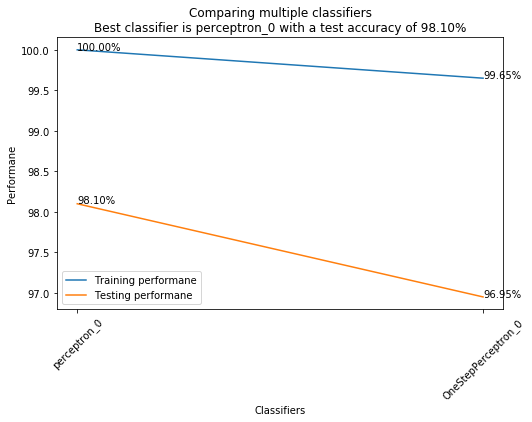

Training classifiers to classify  1
Calculating the accuracies... 


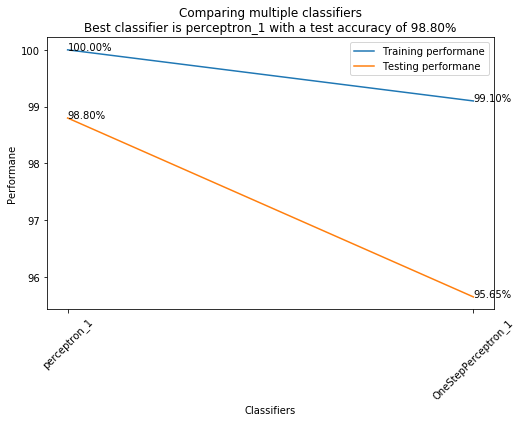

Training classifiers to classify  2
Calculating the accuracies... 


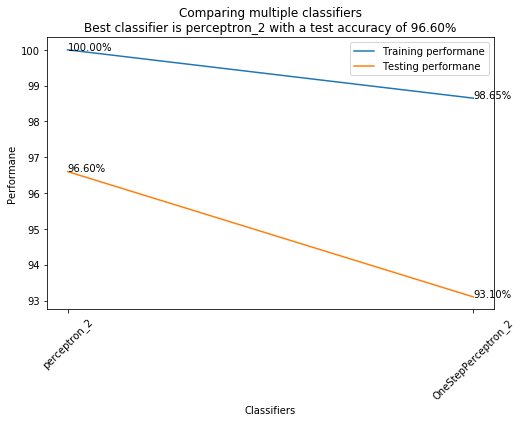

Training classifiers to classify  3
Calculating the accuracies... 


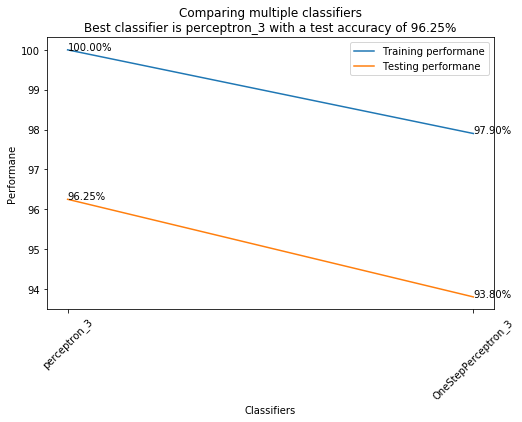

Training classifiers to classify  4
Calculating the accuracies... 


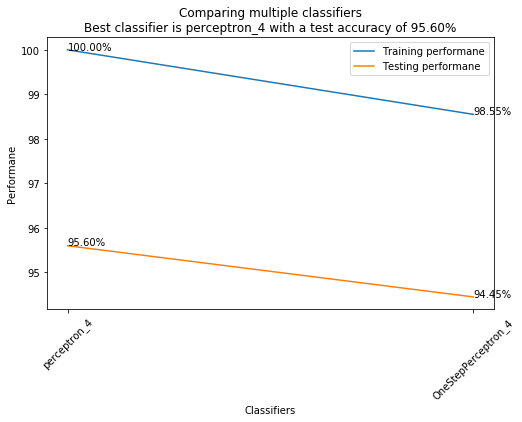

Training classifiers to classify  5
Calculating the accuracies... 


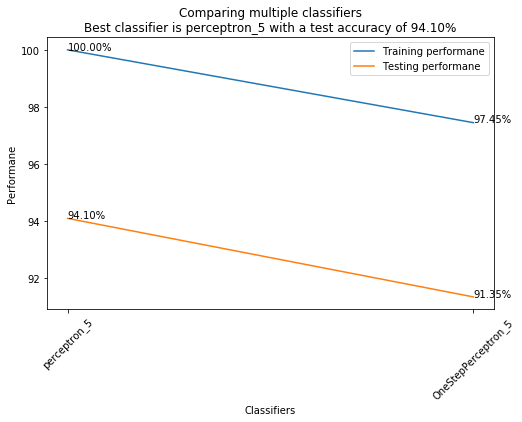

Training classifiers to classify  6
Calculating the accuracies... 


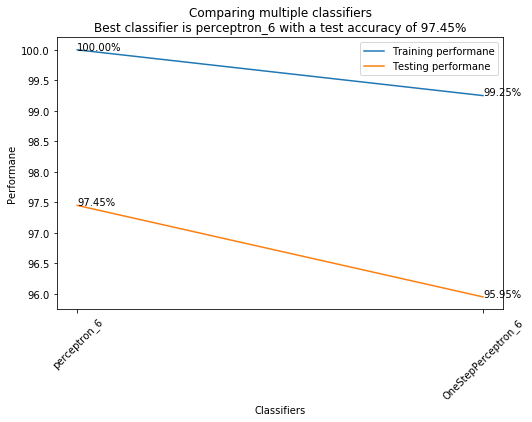

Training classifiers to classify  7
Calculating the accuracies... 


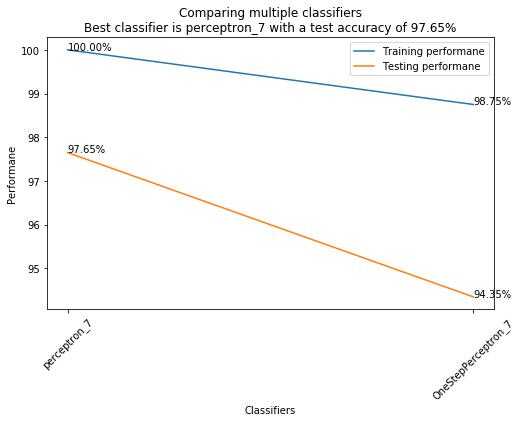

Training classifiers to classify  8
Calculating the accuracies... 


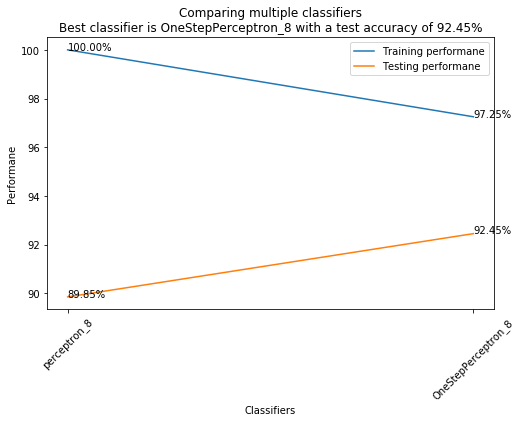

Training classifiers to classify  9
Calculating the accuracies... 


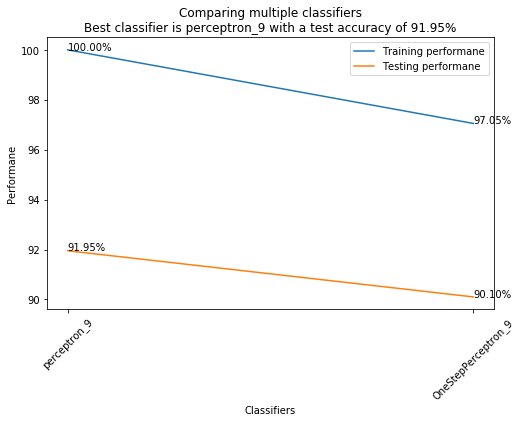

CPU times: user 6min 23s, sys: 290 ms, total: 6min 23s
Wall time: 6min 24s


In [275]:
%%time

best_classifiers = one_vs_rest_training(train_set, test_set, plot="default")

In [276]:
best_classifiers

{'perceptron_0': <iads.Classifiers.ClassifierPerceptron at 0x7ff80b2d9e90>,
 'perceptron_1': <iads.Classifiers.ClassifierPerceptron at 0x7ff80b6015d0>,
 'perceptron_2': <iads.Classifiers.ClassifierPerceptron at 0x7ff80b394550>,
 'perceptron_3': <iads.Classifiers.ClassifierPerceptron at 0x7ff80b5c2110>,
 'perceptron_4': <iads.Classifiers.ClassifierPerceptron at 0x7ff80c76aed0>,
 'perceptron_5': <iads.Classifiers.ClassifierPerceptron at 0x7ff80b577f50>,
 'perceptron_6': <iads.Classifiers.ClassifierPerceptron at 0x7ff80c6fb090>,
 'perceptron_7': <iads.Classifiers.ClassifierPerceptron at 0x7ff80b48d2d0>,
 'OneStepPerceptron_8': <iads.Classifiers.ClassifierOneStepPerceptron at 0x7ff80b510dd0>,
 'perceptron_9': <iads.Classifiers.ClassifierPerceptron at 0x7ff80b51b2d0>}

In [331]:
def one_vs_rest_predict(best_classifiers : dict, description : np.ndarray, explain=False):
    """
        One vs rest classification, this function is responsible for prediction the corresponding label for description.
        
        We take the most confident classifier that classifies 1 and we return its corresponding label.
    """
    assert isinstance(best_classifiers, dict)
    assert isinstance(description, np.ndarray)
    assert isinstance(explain, bool)
    
    scores      = [classifier.score(description) for classifier in best_classifiers.values()]
    predictions = [classifier.predict(description) for classifier in best_classifiers.values()]
    
    most_confident_score = max(scores)
    predicted_label = scores.index(most_confident_score)
    
    if explain:
        plt.title("This is the description that you passed ")
        plt.imshow(description.reshape(28, 28))
        plt.figtext(0.5, 0.01, "Predicted digit: " + str(predicted_label), horizontalalignment='center',\
                    fontsize=16)
        print("Score for each classifier: ")
        
        i = 0
        for classifier in best_classifiers:
            print(classifier + " -> " + str(scores[i]))
            i += 1
            
        print("\nWe take the label of the most confident classifier")
        print("Max score: ", most_confident_score)
        print("Corresponds to ", list(best_classifiers.keys())[scores.index(most_confident_score)])
        print("Hence predicting ", predicted_label)
        
        if predictions.count(1) == 0 or predictions.count(1) > 1:
            print("\n [WARNING]: This is a case where we don't know that to predict")
            print("Predict the argmax anyhow")
    
    return predicted_label

In [334]:
def one_vs_rest_accuracy(best_classifiers : dict, test_set : tuple):
    """
        Calculating the accuracy using one_vs_rest approach.
        
    """
    
    assert isinstance(best_classifiers, dict)
    assert len(test_set) == 2
    
    X_test, Y_test = test_set
    
    predictions = [one_vs_rest_predict(best_classifiers, description, explain=False) for description in X_test]
    
    acc = [1 if predictions[i] == Y_test[i] else 0 for i in range(len(Y_test))]
    
    return float(sum(acc) / len(Y_test))

In [339]:
one_vs_rest_accuracy(best_classifiers, train_set)

1.0

In [340]:
one_vs_rest_accuracy(best_classifiers, test_set)

0.801

## Refactoring the code

    Dans cette partie, je vais juste combiner tous les fonctions de one-vs-rest pour creer une classe d'un classifieur multi-classes ( compose par plusieurs Perceptrons )pour simplifier le code et generer les predictions pour le fichier eval_multi

In [349]:
class MultiClassClassifier(cl.Classifier):
    
    def __init__(self, input_dimension, learning_rate, max_iter=1e2):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.weights = np.random.normal(0, 0.5, input_dimension + 1)
        self.w_init = self.weights
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        
    def one_vs_rest_labels(self, Y_train : np.ndarray, Y_test : np.ndarray):
        """
            Implementing one_vs_rest, this function transform the labels passed in Y_[train, test], each iteration 
            we choose a class to be classified transform its corresponding label to +1 and rest to -1, then returns
            the new label set.

            @params: 
                Y_train: numpy array (training labels)
                Y_test: np.ndarray (test labels)

            returns:
                generator
        """
        assert isinstance(Y_train, np.ndarray)
        assert isinstance(Y_test, np.ndarray)
        assert Y_train.shape == Y_test.shape

        unique_train_labels = np.unique(Y_train)
        unique_test_labels = np.unique(Y_test)

        assert np.all(unique_test_labels == unique_train_labels)

        # each iteration, we take a class to be recognized (trans -> +1) and the others to -1
        for label in unique_train_labels:

            # reset the labels
            original_Y_train = np.array(Y_train)
            original_Y_test = np.array(Y_test)

            # transforming the labels
            selected_indices = np.argwhere(original_Y_train == label)[:,0]
            other_indices = np.argwhere(original_Y_train != label)[:,0]
            original_Y_train[selected_indices] = 1
            original_Y_train[other_indices] = -1
            original_Y_train = original_Y_train.astype(int)


            selected_indices = np.argwhere(original_Y_test == label)[:,0]
            other_indices = np.argwhere(original_Y_test != label)[:,0]
            original_Y_test[selected_indices] = 1
            original_Y_test[other_indices] = -1
            original_Y_test = original_Y_test.astype(int)

            yield (original_Y_train, original_Y_test, label)
            
        
    def train(self, training_set : tuple, test_set : tuple, plot="none") -> dict:
        """
            This function will train a bunch of binary classifiers using one vs rest, 
            evaluate them with test_set and returns the best classifier for each class.

            @params:
                training_set -> tuple (X, Y)
                test_set -> tuple (X, Y)
                plot -> str ("none", "scatter" or "default")

            return a dictionnary
        """
        assert len(training_set) == 2
        assert len(test_set) == 2
        assert isinstance(plot, str)

        X_train, Y_train = training_set
        X_test, Y_test = test_set

        best_classifiers_dict = dict()

        # transforming the labels
        for y_train, y_test, label in self.one_vs_rest_labels(Y_train, Y_test):

            ################################ Creating classifiers dictionnary to compare performances ################

            classif_dict = dict()
            classif_dict['perceptron_' + str(label)] = cl.ClassifierPerceptron(X_train.shape[1], 1e-3, max_iter=1e3)
            classif_dict['OneStepPerceptron_' + str(label)] = cl.ClassifierOneStepPerceptron(X_train.shape[1])

            ##########################################################################################################

            classif_dict_to_plot = dict()

            print("Training classifiers to classify ", label)

            # Training the classifiers
            for classifier in classif_dict.values():
                classifier.train(X_train, y_train)

            print("Calculating the accuracies... ")

            # taking their accuracies and constructing another dictionnary that will serve to plot
            for classifier_name, classifier in classif_dict.items():

                if isinstance(classifier, cl.ClassifierKNN):
                    train_acc = classifier.fast_accuracy(X_train, y_train)
                    test_acc  = classifier.fast_accuracy(X_test, y_test)
                else:
                    train_acc = classifier.accuracy(X_train, y_train)
                    test_acc  = classifier.accuracy(X_test, y_test)

                classif_dict_to_plot[classifier_name] = (train_acc, test_acc)

            # Taking the best classifier for this label
            best_classifier_name = max(classif_dict_to_plot.items(), key=lambda x: x[1][1])[0]
            best_classifiers_dict[best_classifier_name] = classif_dict[best_classifier_name]

            # plotting
            if plot is not "none":
                if plot == "scatter":
                    compare_classifiers(classif_dict_to_plot, True)
                else:
                    compare_classifiers(classif_dict_to_plot, False)

            self.best_classifiers = best_classifiers_dict

    def predict(self, description : np.ndarray, explain=False):
        """
            One vs rest classification, this function is responsible for prediction the corresponding label for description.

            We take the most confident classifier that classifies 1 and we return its corresponding label.
        """
        best_classifiers = self.best_classifiers

        assert isinstance(best_classifiers, dict)
        assert isinstance(description, np.ndarray)
        assert isinstance(explain, bool)

        scores      = [classifier.score(description) for classifier in best_classifiers.values()]
        predictions = [classifier.predict(description) for classifier in best_classifiers.values()]

        most_confident_score = max(scores)
        predicted_label = scores.index(most_confident_score)

        if explain:
            plt.title("This is the description that you passed ")
            plt.imshow(description.reshape(28, 28))
            plt.figtext(0.5, 0.01, "Predicted digit: " + str(predicted_label), horizontalalignment='center',\
                        fontsize=16)
            print("Score for each classifier: ")

            i = 0
            for classifier in best_classifiers:
                print(classifier + " -> " + str(scores[i]))
                i += 1

            print("\nWe take the label of the most confident classifier")
            print("Max score: ", most_confident_score)
            print("Corresponds to ", list(best_classifiers.keys())[scores.index(most_confident_score)])
            print("Hence predicting ", predicted_label)

            if predictions.count(1) == 0 or predictions.count(1) > 1:
                print("\n [WARNING]: This is a case where we don't know that to predict")
                print("Predict the argmax anyhow")

        return predicted_label
    
    def accuracy(self, test_set : tuple):
        """
            Calculating the accuracy using one_vs_rest approach.

        """
        best_classifiers = self.best_classifiers
        assert isinstance(best_classifiers, dict)
        assert len(test_set) == 2

        X_test, Y_test = test_set

        predictions = [one_vs_rest_predict(best_classifiers, description, explain=False) for description in X_test]

        acc = [1 if predictions[i] == Y_test[i] else 0 for i in range(len(Y_test))]

        return float(sum(acc) / len(Y_test))

In [353]:
cl_test = MultiClassClassifier(mnist_train_x.shape[1], 1e-3)
cl_test.train(train_set, test_set)

Training classifiers to classify  0
Calculating the accuracies... 
Training classifiers to classify  1
Calculating the accuracies... 
Training classifiers to classify  2
Calculating the accuracies... 
Training classifiers to classify  3
Calculating the accuracies... 
Training classifiers to classify  4
Calculating the accuracies... 
Training classifiers to classify  5
Calculating the accuracies... 
Training classifiers to classify  6
Calculating the accuracies... 
Training classifiers to classify  7
Calculating the accuracies... 
Training classifiers to classify  8
Calculating the accuracies... 
Training classifiers to classify  9
Calculating the accuracies... 


In [361]:
multi_perceptron = cl_test

In [362]:
multi_perceptron.accuracy(train_set)

1.0

In [363]:
multi_perceptron.accuracy(test_set)

0.812

## Conclusion pour la partie optionnelle

    Comme on le voit ci-dessus, on a trainning_accuracy = 100% tandis que test accuracy est juste 81.2%, ce qui est pas mal pour un ensemble des modeles simple mais pas suffisant aussi.
    
    En comparant cette methode, qui utilise un classifieur pour chaque classe, avec le KNN multi-class, on trouve que ce dernier est meiux avec une test accuracy de 89.65%.
    
    Une de raison pour lequel le KNN est mieux, c'est que le multi-classifieur compose des perceptrons peut avoir un comportement indéfini quand tous les classifieurs prédisent -1 ou bien plus qu'un classifieur prédisent +1. Dans le dernier cas, j'ai chosit la classe du perceptron le plus confient (en terme du score). 
    
    Pour le premier cas, on peut par exemple chosir de donner le label de la classe majoritaire, or puisque le jeu de donnee est parfaitement balance, je retourne le label qui correspond au meilleur score en tout cas.
    
    Voici un exemple (tous les scores sont negatifs):

Score for each classifier: 
perceptron_0 -> -11326.054989939883
perceptron_1 -> -16504.046234742455
perceptron_2 -> -18772.670662495322
perceptron_3 -> -6232.535926959593
perceptron_4 -> -5852.503081662743
perceptron_5 -> -13548.6027580165
perceptron_6 -> -8350.818548353895
perceptron_7 -> -4388.206923305503
OneStepPerceptron_8 -> -0.797786747824843
perceptron_9 -> -121.48889373257498

We take the label of the most confident classifier
Max score:  -0.797786747824843
Corresponds to  OneStepPerceptron_8
Hence predicting  8

 [WARNING]: This is a case where we don't know that to predict
Predict the argmax anyhow


8

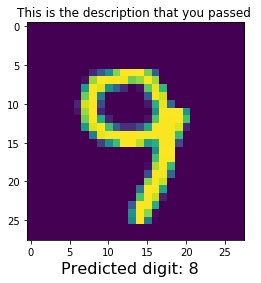

In [369]:
multi_perceptron.predict(mnist_test_x[1949], explain=True)

In [371]:
generate_eval_labels_multi([multi_perceptron, mnist_knn], '/home/shetsecure/dataScience/3i026/Bases_IADS_multiclasses/eval_multi.csv')

Constructing eval file for MultiClassClassifier classifier
Done
Constructing eval file for MultiClassKNN classifier
Done


In [323]:
path = '/home/shetsecure/dataScience/3i026/Bases_IADS_multiclasses/eval_multi.csv'
generate_eval_labels_multi([mnist_knn_deskew], path, skew=True)

Constructing eval file for MultiClassKNN classifier
[Warning] you applied deskewing
Done


In [307]:
mnist_knn_deskew.fast_accuracy(mnist_test_x_deskew, mnist_test_y)

0.934

In [318]:
tst = pd.read_csv('/home/shetsecure/dataScience/3i026/resultat_MultiClassKNN.csv', header=None, sep=';')
tst.drop(columns=[0], inplace=True)
tst.to_numpy().ravel()

array([0, 0, 0, ..., 9, 9, 9])

In [321]:
np.all(mnist_knn_deskew._last_predictions == tst.to_numpy().ravel())

True

In [322]:
np.unique(tst.to_numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])